# 2016 Summer Olympic Games in Rio
## Analysis of Medal Counts Normalized by GDP or Population


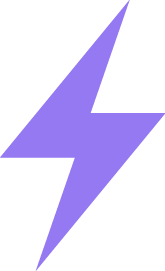

Connected to server at http://public.lightning-viz.org


<IPython.core.display.Javascript object>

In [106]:
import os
import pickle
import sys
import numpy as np
import pandas as pd
from lightning import Lightning
lgn = Lightning(ipython=True, host='http://public.lightning-viz.org')

In [69]:
# Dict of country codes
codes = {'Afghanistan': 'AFG', 'Albania': 'ALB', 'Algeria': 'DZA', 
         'American Samoa': 'ASM', 'Angola': 'AGO',
         'Antigua and Barbuda': 'ATG', 'Argentina': 'ARG',
         'Armenia': 'ARM', 'Aruba': 'ABW', 'Australia': 'AUS',
         'Austria': 'AUT', 'Azerbaijan': 'AZE', 'The Bahamas': 'BHS',
         'Bahrain': 'BHR', 'Bangladesh': 'BGD', 'Barbados': 'BRB',
         'Belarus': 'BLR', 'Belgium': 'BEL', 'Belize': 'BLZ',
         'Benin': 'BEN', 'Bermuda': 'BMU', 'Bhutan': 'BTN',
         'Bolivia': 'BOL', 'Bosnia & Herzegovina': 'BIH',
         'Botswana': 'BWA', 'Brazil': 'BRA', 'Brunei Darussalam': 'BRN',
         'Bulgaria': 'BGR', 'Burkina Faso': 'BFA', 'Burundi': 'BDI',
         'Cambodia': 'KHM', 'Cameroon': 'CMR', 'Canada': 'CAN',
         'Cape Verde': 'CPV', 'Central African Rep.': 'CAF', 'Chad': 'TCD',
         'Chile': 'CHL', 'China': 'CHN', 'Hong Kong': 'HKG',
         'Macao': 'MAC', 'Colombia': 'COL', 'Comoros': 'COM',
         'Democratic Republic of Congo': 'ZAR', 'Republic of Congo': 'COG',
         'Costa Rica': 'CRI', 'Côte d\'Ivoire': 'CIV', 'Croatia': 'HRV',
         'Cuba': 'CUB', 'Czech Republic': 'CZE', 'Denmark': 'DNK',
         'Djibouti': 'DJI', 'Dominica': 'DMA', 'Dominican Republic': 'DOM',
         'Ecuador': 'ECU', 'Egypt': 'EGY', 'El Salvador': 'SLV',
         'Equatorial Guinea': 'GNQ', 'Eritrea': 'ERI', 'Estonia': 'EST',
         'Ethiopia': 'ETH', 'Faeroe Islands': 'FRO', 'Fiji': 'FJI',
         'Finland': 'FIN', 'France': 'FRA', 'French Polynesia': 'PYF',
         'Gabon': 'GAB', 'The Gambia': 'GMB', 'Georgia': 'GEO',
         'Germany': 'DEU', 'Ghana': 'GHA', 'Gibraltar': 'GIB',
         'Greece': 'GRC', 'Greenland': 'GRL', 'Grenada': 'GRD',
         'Guadeloupe': 'GLP', 'Guam': 'GUM', 'Guatemala': 'GTM',
         'French Guiena': 'GUF', 'Guinea': 'GNB', 'Guinea-Bissau': 'GIN',
         'Guyana': 'GUY', 'Haiti': 'HTI', 'Honduras': 'HND',
         'Hungary': 'HUN', 'Iceland': 'ISL', 'India': 'IND',
         'Indonesia': 'IDN', 'Islamic Republic of Iran': 'IRN',
         'Iraq': 'IRQ', 'Ireland': 'IRL', 'Israel': 'ISR', 'Italy': 'ITA',
         'Jamaica': 'JAM', 'Japan': 'JPN', 'Jordan': 'JOR',
         'Kazakhstan': 'KAZ', 'Kenya': 'KEN', 'Kiribati': 'KIR',
         'South Korea': 'KOR', 'Kuwait': 'KWT', 'Kyrgyzstan': 'KGZ',
         'Lao People\'s Dem.Rep': 'LAO', 'Latvia': 'LVA', 'Lebanon': 'LBN',
         'Lesotho': 'LSO', 'Liberia': 'LBR', 'Libya': 'LBY',
         'Lithuania': 'LTU', 'Luxembourg': 'LUX', 'FYR Macedonia': 'MKD',
         'Madagascar': 'MDG', 'Malawi': 'MWI', 'Malaysia': 'MYS',
         'Maldives': 'MDV', 'Mali': 'MLI', 'Malta': 'MLT',
         'Martinique': 'MTQ', 'Mauritania': 'MRT', 'Mauritius': 'MUS',
         'Mexico': 'MEX', 'Moldova': 'MDA', 'Mongolia': 'MNG',
         'Morocco': 'MAR', 'Mozambique': 'MOZ', 'Myanmar': 'MMR',
         'Namibia': 'NAM', 'Nauru': 'NAU', 'Nepal': 'NPL',
         'Netherlands': 'NLD', 'Netherlands Antilles': 'ANT',
         'New Caledonia': 'NCL', 'New Zealand': 'NZL', 'Nicaragua': 'NIC',
         'Niger': 'NER', 'Nigeria': 'NGA', 'Norway': 'NOR', 'Oman': 'OMN',
         'Pakistan': 'PAK', 'Palau': 'PLW', 'Panama': 'PAN',
         'Papua New Guinea': 'PNG', 'Paraguay': 'PRY', 'Peru': 'PER',
         'Philippines': 'PHL', 'Poland': 'POL', 'Portugal': 'PRT',
         'Qatar': 'QAT', 'Réunion': 'REU', 'Romania': 'ROM',
         'Rwanda': 'RWA', 'Samoa': 'WSM', 'São Tomé & Príncipe': 'STP',
         'Saudi Arabia': 'SAU', 'Senegal': 'SEN', 'Serbia': 'SER',
         'Seychelles': 'SYC', 'Sierra Leone': 'SLE', 'Singapore': 'SIN',
         'Slovenia': 'SVN', 'Solomon Islands': 'SLB', 'Somalia': 'SOM',
         'South Africa': 'ZAF', 'Spain': 'ESP', 'Sri Lanka': 'LKA',
         'St. Kitts and Nevis': 'KNA', 'St. Lucia': 'LCA',
         'St. Vincent & Grens.': 'VCT', 'Sudan': 'SDN', 'Suriname': 'SUR',
         'Swaziland': 'SWZ', 'Sweden': 'SWE', 'Switzerland': 'CHE',
         'Syrian Arab Republic': 'SYR', 'Tajikistan': 'TJK',
         'Tanzania': 'TZA', 'Thailand': 'THA', 'Togo': 'TGO',
         'Tonga': 'TON', 'Trinidad & Tobago': 'TTO', 'Tunisia': 'TUN',
         'Turkey': 'TUR', 'Turkmenistan': 'TKM', 'Uganda': 'UGA',
         'Ukraine': 'UKR', 'United Arab Emirates': 'ARE',
         'Great Britain': 'GBR', 'United States': 'USA', 'Uruguay': 'URY',
         'Uzbekistan': 'UZB', 'Vanuatu': 'VUT', 'Venezuela': 'VEN',
         'Vietnam': 'VNM', 'West Bank/Gaza Strip': 'WBG',
         'Republic of Yemen': 'YEM', 'Yugoslavia': 'YUG', 'Zambia': 'ZMB',
         'Zimbabwe': 'ZWE'}
# Had trouble with the following country codes: 'North Korea':'PRK','Slovakia':'SVK','Cyprus':'CYP',

In [117]:
# Load data from saved file and merge list to Pandas DataFrame
fname = 'data.pkl'
if os.path.isfile(fname):
    pkl_file = open(fname, 'rb')
    medalsDF = pickle.load(pkl_file)
    pkl_file.close()

col = np.empty(len(medalsDF['country_name']),); col[:] = np.nan
medalsDF.loc[:, 'code'] = pd.Series(col, index=medalsDF.index)
for name in medalsDF['country_name']:
    if name in codes:
        medalsDF.loc[(medalsDF.country_name == name),'code'] = codes[name]

# Manual data entry from Google (Sources include: World Bank)
medalsDF.loc[(medalsDF.country_name == 'Russia'),'code']= 'RUS'
medalsDF.loc[(medalsDF.country_name == 'Russia'),'GDP'] = 2.1
medalsDF.loc[(medalsDF.country_name == 'Russia'),'Population'] = 1.435e8
medalsDF.loc[(medalsDF.country_name == 'Singapore'),'GDP'] = 0.26
medalsDF.loc[(medalsDF.country_name == 'Singapore'),'Population'] = 5.4e6

# Find total medal count (who won the most medals?)


In [114]:
medalsDF.head()

,bronze_count,country_name,gold_count,id,place,silver_count,total_count,GDP,Population,code,medalspergdp,medalsperpop
0,38,United States,46,united-states,1,37,121,15.705,3.188571e+08,USA,121.000000,121.000000
1,17,Great Britain,27,great-britain,2,23,67,2.333,6.451038e+07,GBR,451.022289,331.162583
2,26,China,26,china,3,18,70,17.647,1.357380e+09,CHN,62.296708,16.443438
3,19,Russia,19,russia,4,18,56,2.100,1.435000e+08,RUS,418.800000,124.432022
4,15,Germany,17,germany,5,10,42,3.330,8.088950e+07,DEU,198.081081,165.559133


# Map total of medal-winning countries in orange to black

In [111]:
# Countries that exist in our medal-winners dataset
mycountries = list(medalsDF.loc[medalsDF.loc[:, 'code'].notnull(), 'code'])

values = medalsDF.loc[medalsDF.loc[:, 'code'].notnull(), 'total_count']
values = list(values.fillna(0))
lgn.map(mycountries, values, colormap='Oranges',width=600, height=300)

# Map GDP of medal-winning countries in purple

In [118]:
values = medalsDF.loc[medalsDF.loc[:, 'code'].notnull(), 'GDP']
values = list(values.fillna(0))
lgn.map(mycountries, values, colormap='Purples', width=600, height=300)

# Map populations of medal-winning countries in green

In [79]:
values = medalsDF.loc[medalsDF.loc[:, 'code'].notnull(), 'Population']
values = list(values.fillna(0))
lgn.map(mycountries, values, colormap='Greens', width=600, height=300)

# Find medal count divided by GDP (who does more with less money?)

In [104]:
medalsDF.loc[:, 'medalspergdp'] = pd.Series(col, index=medalsDF.index)
medalsDF.loc[:, 'medalspergdp'] = medalsDF.loc[:, 'total_count'] \
                                  / medalsDF.loc[:, 'GDP'] \
                                  * medalsDF.loc[(medalsDF.country_name == 'United States'),'GDP'].values
medalsDF.sort_values(by='medalspergdp', ascending=False).head()

,bronze_count,country_name,gold_count,id,place,silver_count,total_count,GDP,Population,code,medalspergdp,medalsperpop
69,0,Grenada,0,grenada,69,1,1,0.001,106303.0,GRD,15705.000000,2999.511359
15,2,Jamaica,6,jamaica,16,3,11,0.022,2721252.0,JAM,7852.500000,1288.902173
37,4,Georgia,2,georgia,38,1,7,0.031,4504100.0,GEO,3546.290323,495.548365
41,0,Armenia,1,armenia,42,3,4,0.022,2983990.0,ARM,2855.454545,427.423759
68,0,Burundi,0,burundi,69,1,1,0.007,10482752.0,BDI,2243.571429,30.417304


# Map GDP-weighted Total Medal Count in Blue

In [91]:
values = medalsDF.loc[medalsDF.loc[:, 'code'].notnull(), 'medalspergdp']
values = list(values.fillna(0))
lgn.map(mycountries, values, colormap='Blues', width=600, height=300)

# Find medal count divided by population (who does more with fewer people?)

In [103]:
medalsDF.loc[:, 'medalsperpop'] = pd.Series(col, index=medalsDF.index)
medalsDF.loc[:, 'medalsperpop'] = medalsDF.loc[:, 'total_count'] \
                                  / medalsDF.loc[:, 'Population'] \
                                  * medalsDF.loc[(medalsDF.country_name == 'United States'),'Population'].values
medalsDF.sort_values(by='medalsperpop', ascending=False).head()

,bronze_count,country_name,gold_count,id,place,silver_count,total_count,GDP,Population,code,medalspergdp,medalsperpop
69,0,Grenada,0,grenada,69,1,1,0.001,106303.0,GRD,15705.000000,2999.511359
15,2,Jamaica,6,jamaica,16,3,11,0.022,2721252.0,JAM,7852.500000,1288.902173
18,5,New Zealand,4,new-zealand,19,9,18,0.147,4509700.0,NZL,1923.061224,1272.684881
27,7,Denmark,2,denmark,28,6,15,0.225,5639565.0,DNK,1047.000000,848.089496
16,2,Croatia,5,croatia,17,3,10,0.079,4236400.0,HRV,1987.974684,752.660410


# Map Population-weighted Total Medal Count in Red

In [93]:
values = medalsDF.loc[medalsDF.loc[:, 'code'].notnull(), 'medalsperpop']
values = list(values.fillna(0))
lgn.map(mycountries, values, colormap='Reds', width=600, height=300)